In [1]:
#make 4 grid depicting column density with curve fit function
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize

In [2]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
percent = 0
perc = '0'
titles = ('gravity only', 'gravity + turbulence','gravity + turbulence\n + magnetic fields', 'gravity + turbulence\n + magnetic fields + protostellar outflows')
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )
#remove lower limit and make upper limit adjustable in code for log normal


In [3]:
#define function
def lognorm(x,mu,sigma):
   return np.log((1/(np.sqrt(2*np.pi*sigma**2)))*(np.exp(-((x-mu)**2)/(2*sigma**2))))
 
    


In [4]:
#plot setup
d = {}
upper_limit = .75
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
input_file = inputfile[percent]
plot_data = np.load(input_file, allow_pickle=True)

starting
0
[0.40171964381495967]
[0.40171964381495967, 0.3701010301711958]
[0.40171964381495967, 0.3701010301711958, 0.4489716635091219]
1
[0.40171964381495967, 0.3701010301711958, 0.4489716635091219, 0.5647527784401524]
[0.40171964381495967, 0.3701010301711958, 0.4489716635091219, 0.5647527784401524, 0.7445238485077531]
[0.40171964381495967, 0.3701010301711958, 0.4489716635091219, 0.5647527784401524, 0.7445238485077531, 0.7020752590694619]
2
[0.40171964381495967, 0.3701010301711958, 0.4489716635091219, 0.5647527784401524, 0.7445238485077531, 0.7020752590694619, 0.5878718478456219]
[0.40171964381495967, 0.3701010301711958, 0.4489716635091219, 0.5647527784401524, 0.7445238485077531, 0.7020752590694619, 0.5878718478456219, 0.4843689381235603]
[0.40171964381495967, 0.3701010301711958, 0.4489716635091219, 0.5647527784401524, 0.7445238485077531, 0.7020752590694619, 0.5878718478456219, 0.4843689381235603, 0.5808460228839775]
3
[0.40171964381495967, 0.3701010301711958, 0.4489716635091219, 0.5

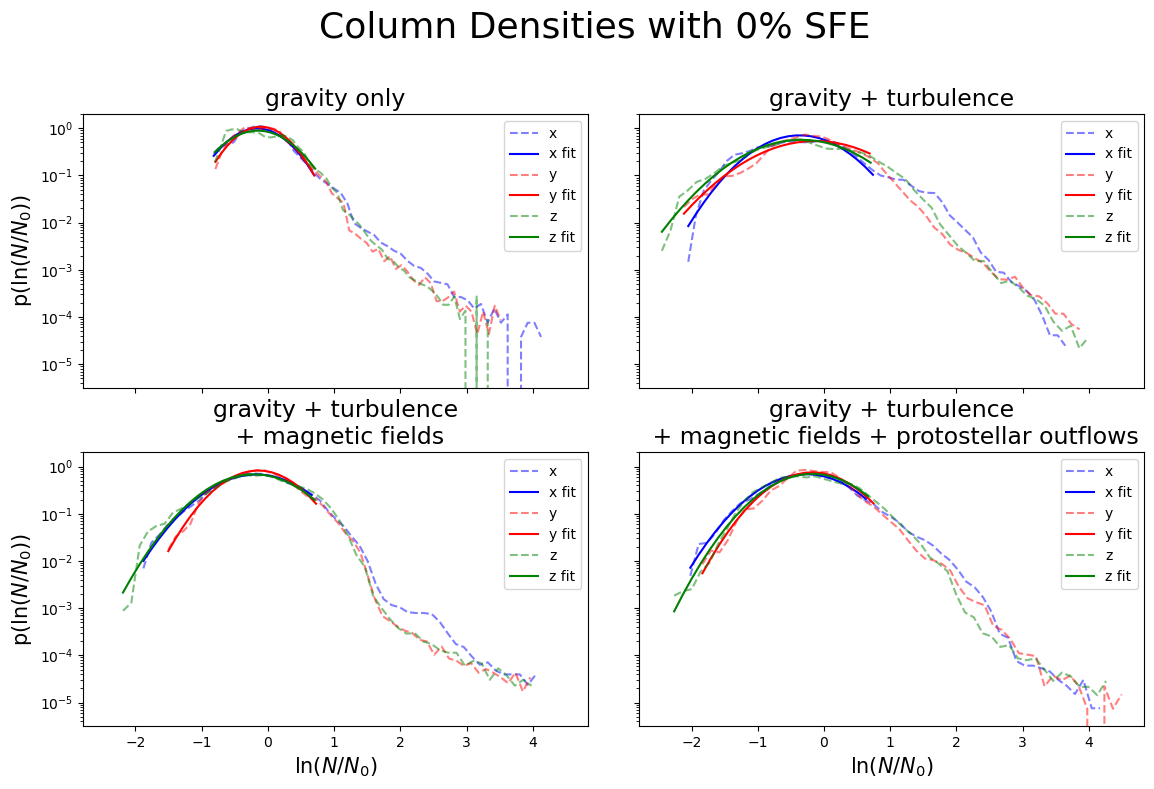

time: 1.889461620648702


In [5]:
#main processing cell. 
start = time.time()
print('starting')
error = []
sigma = []
fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
ax =ax.ravel()
plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
b = 0

for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('b', 'r', 'g')
    print(n)     #for time keeping
    
    for a in (range(3)):
        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        #create subrange and plots linear fit

        #weighting        
#       x_peak = np.argmax(y)
#        y_sigma = []
#        for ii in range(len(y)):            
#            dist = abs(ii-x_peak) - 20           
#            if dist <= 0:
#                dist = 1
#            sig = dist**2
#            y_sigma.append(sig)  

        
        x =[]
        y = []
        for i in range(len(bin_list)):
            if bin_list[i] < upper_limit:
                    x.append(bin_list[i])
                    y.append(counts_d[i])
            else:
                break
        log_param, log_con = scipy.optimize.curve_fit(lognorm, x, np.log(y))
        y = lognorm(np.array(x),log_param[0],log_param[1])
        sigma.append(log_param[1])
        print(sigma)
        error.append(np.sqrt(np.diag(log_con))[1])

        ax[n].plot(bin_list, counts_d, color = color_list[a], linestyle = '--', alpha = .5)
        ax[n].plot(x,np.exp(y), color = color_list[a])
        
    if n > 1:
        ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
    ax[n].set_title(titles[n], size = 17)
    ax[n].set_ylim(10**(-5.5),2)
    ax[n].set_yscale('log')
    ax[n].legend([ 'x','x fit', 'y', 'y fit', 'z', 'z fit'])
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('column_den_normal_4lv_'+perc+'%', bbox_inches='tight')
plt.show()

#write sigma and error to txt file for later
file = open("txt_file_storage/sigma_" +perc+"%.txt", "w")
str_dictionary = repr(sigma)
file.write(str_dictionary + "\n")
str_dictionary = repr(error)
file.write(str_dictionary + "\n")
file.close()

end = time.time()
print("time:",(end-start)/60)

In [31]:
log_con

array([[0.00143568, 0.00056674],
       [0.00056674, 0.00061143]])

starting
0
1
2
3


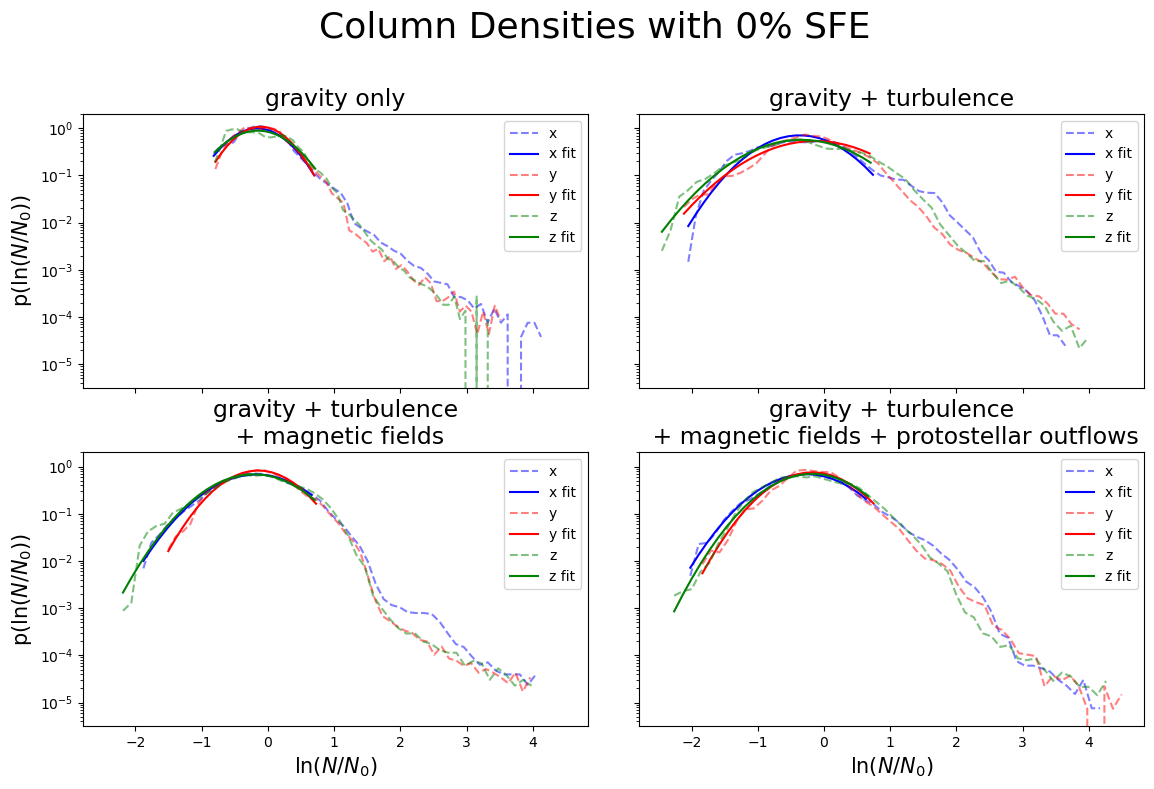

starting
0
1
2
3


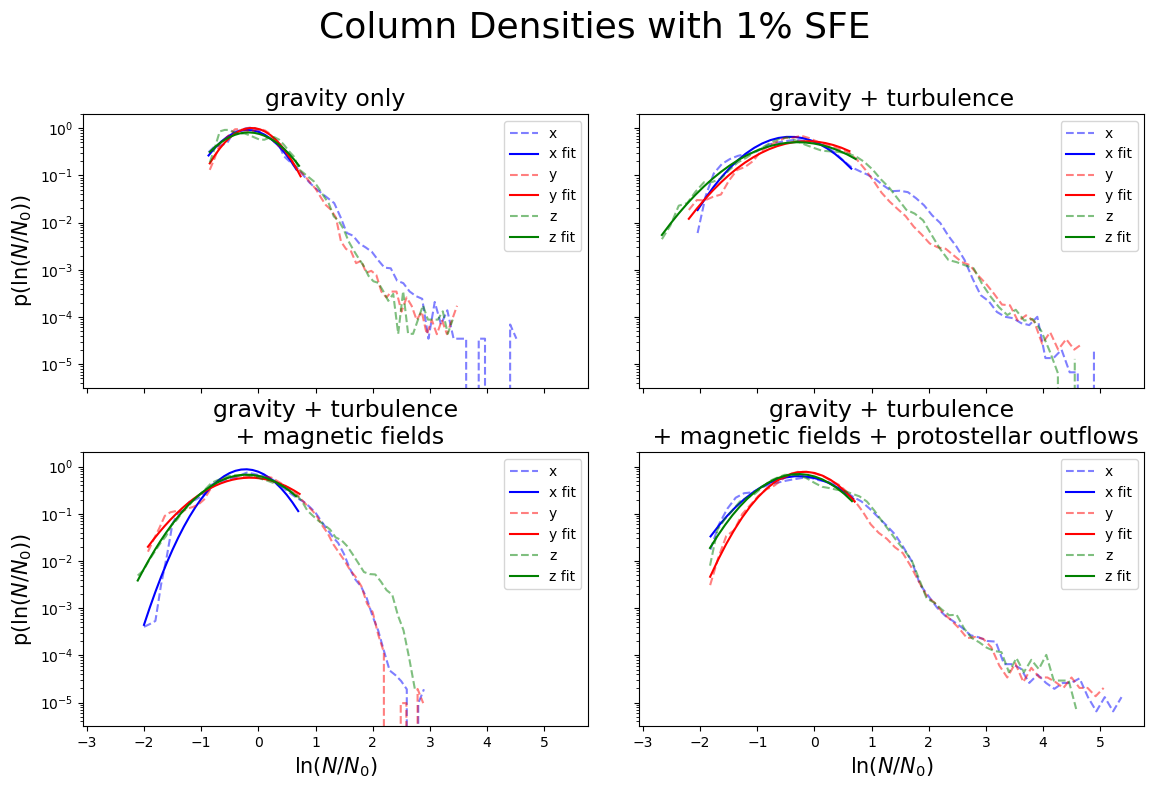

starting
0
1
2
3


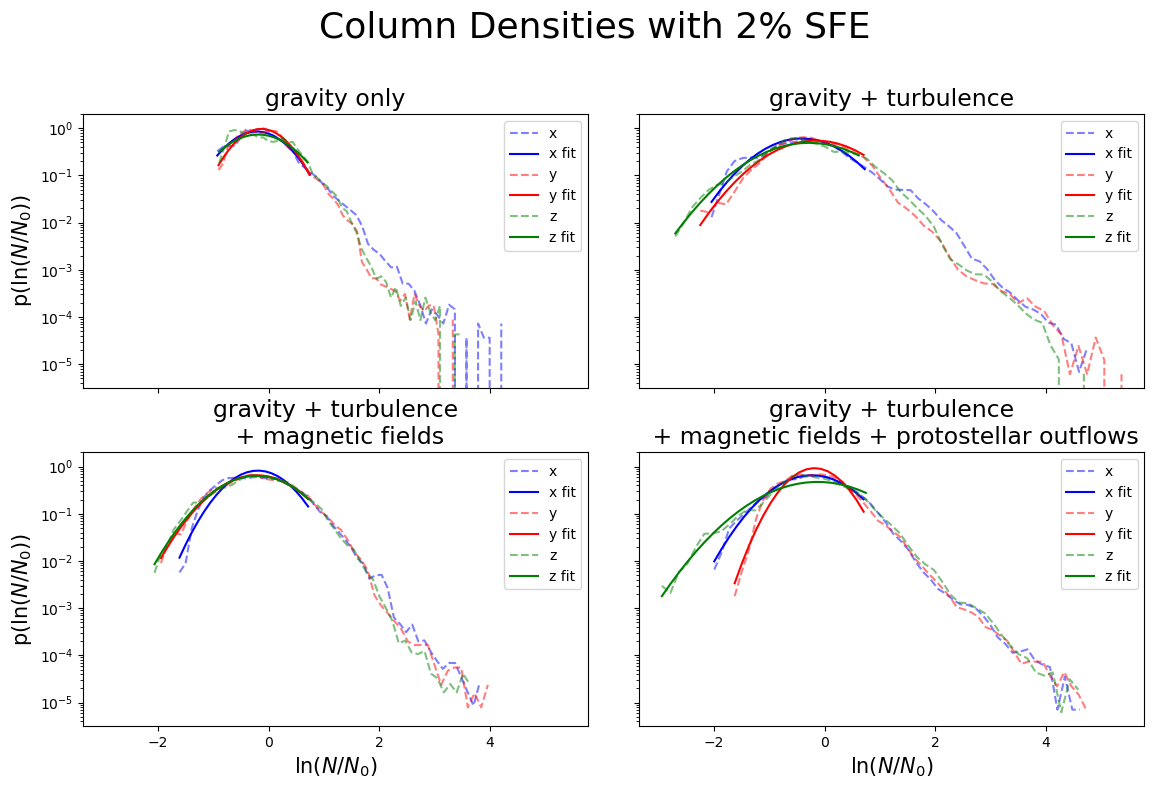

starting
0
1
2
3


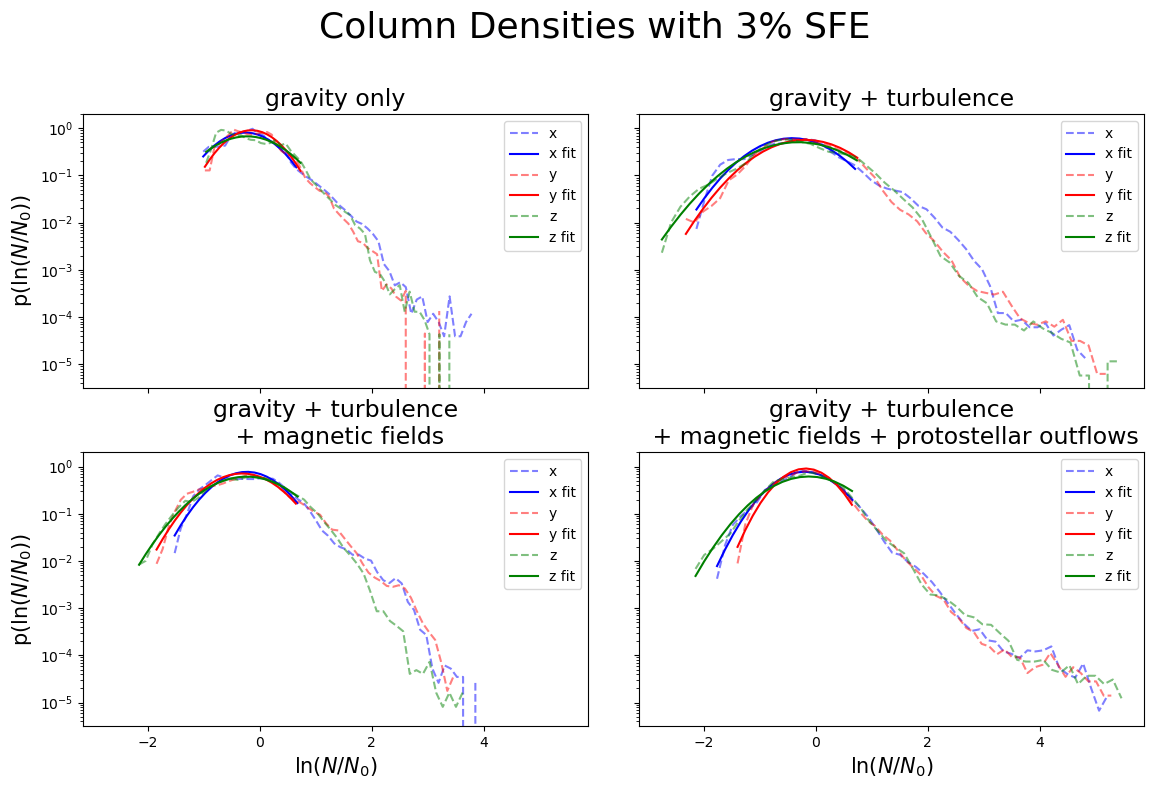

starting
0
1
2
3


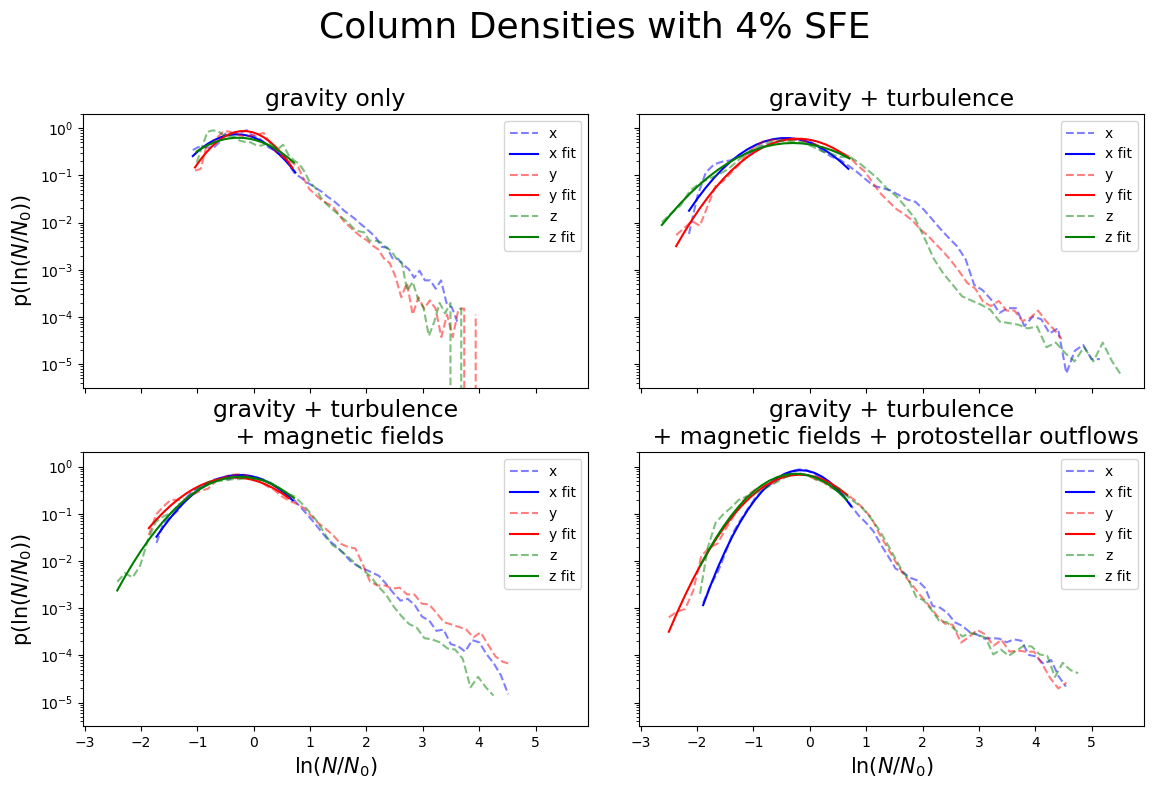

starting
0
1
2
3


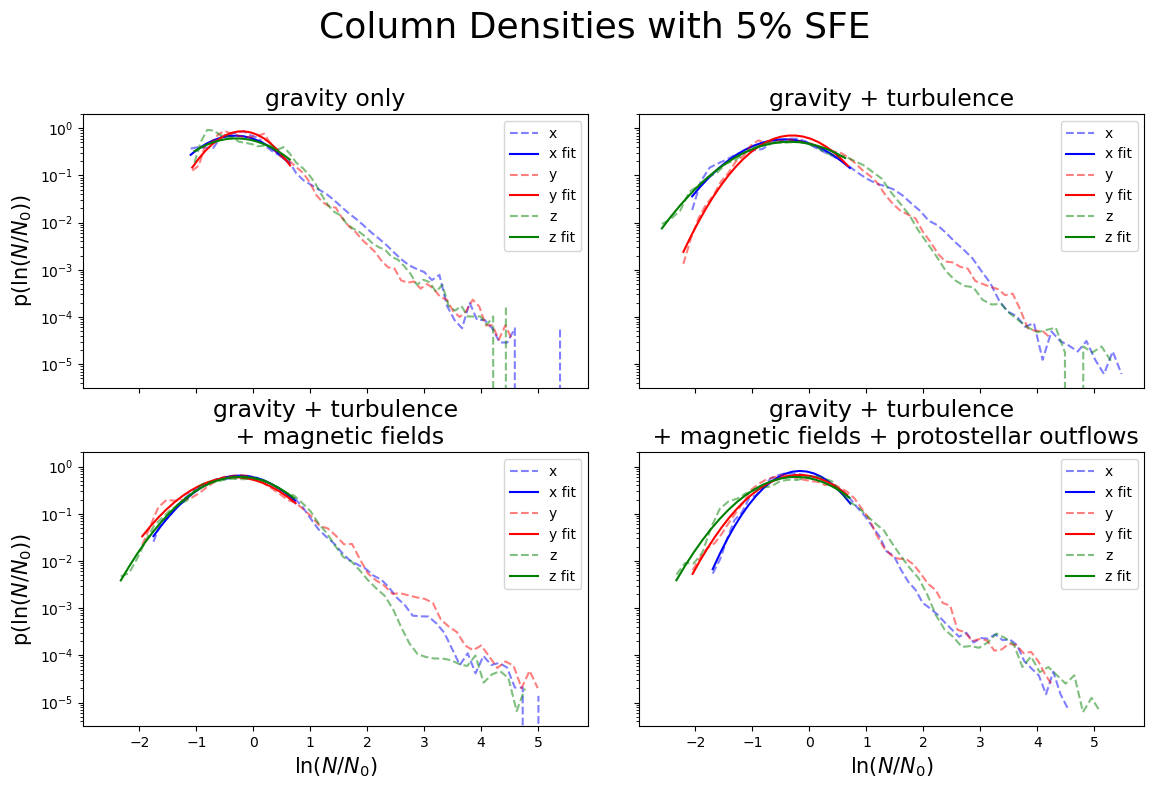

time: 0.8019992431004842


In [5]:
#make 4 grid depicting column density with curve fit function
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize

#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
percent_loop = (0,1,2,3,4,5)
perc_loop = ('0','1','2','3','4','5')
titles = ('gravity only', 'gravity + turbulence','gravity + turbulence\n + magnetic fields', 'gravity + turbulence\n + magnetic fields + protostellar outflows')
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )
#remove lower limit and make upper limit adjustable in code for log normal

#define function
def lognorm(x,mu,sigma):
   return np.log((1/(np.sqrt(2*np.pi*sigma**2)))*(np.exp(-((x-mu)**2)/(2*sigma**2))))
 
#plot setup
d = {}
upper_limit = .75
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')


for aa in range(6):
    percent = percent_loop[aa]
    perc = perc_loop[aa]
    input_file = inputfile[percent]
    plot_data = np.load(input_file, allow_pickle=True)    
    #main processing cell. 
    start = time.time()
    print('starting')
    error = []
    sigma = []
    fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
    ax =ax.ravel()
    plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
    b = 0

    for n in range(4):
        den = plot_data[plot_data.files[n]]
        color_list = ('b', 'r', 'g')
        print(n)     #for time keeping

        for a in (range(3)):
            log_den_d = plot_data[plot_data.files[4+b]]
            counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
            b = b+1

            bin_list = []
            for i in range(len(binS_d)-1):
                bin_i=(binS_d[i]+binS_d[i+1])/2
                bin_list.append(bin_i)
            #create subrange and plots linear fit

            #weighting        
    #       x_peak = np.argmax(y)
    #        y_sigma = []
    #        for ii in range(len(y)):            
    #            dist = abs(ii-x_peak) - 20           
    #            if dist <= 0:
    #                dist = 1
    #            sig = dist**2
    #            y_sigma.append(sig)  


            x =[]
            y = []
            for i in range(len(bin_list)):
                if bin_list[i] < upper_limit:
                        x.append(bin_list[i])
                        y.append(counts_d[i])
                else:
                    break
            log_param, log_con = scipy.optimize.curve_fit(lognorm, x, np.log(y))
            y = lognorm(np.array(x),log_param[0],log_param[1])
            sigma.append(log_param[1])
            error.append(np.sqrt(np.diag(log_con))[1])

            ax[n].plot(bin_list, counts_d, color = color_list[a], linestyle = '--', alpha = .5)
            ax[n].plot(x,np.exp(y), color = color_list[a])

        if n > 1:
            ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
        if n == 0 or n == 2:
            ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
        ax[n].set_title(titles[n], size = 17)
        ax[n].set_ylim(10**(-5.5),2)
        ax[n].set_yscale('log')
        ax[n].legend([ 'x','x fit', 'y', 'y fit', 'z', 'z fit'])
    plt.tight_layout()
    plt.subplots_adjust(top=.85)
    plt.savefig('column_den_normal_4lv_'+perc+'%', bbox_inches='tight')
    plt.show()

    #write sigma and error to txt file for later
    file = open("txt_file_storage/sigma_" +perc+"%_lim75.txt", "w")
    str_dictionary = repr(sigma)
    file.write(str_dictionary + "\n")
    str_dictionary = repr(error)
    file.write(str_dictionary + "\n")
    file.close()

end = time.time()
print("time:",(end-start)/60)

In [91]:
lin_param[0]

-0.018214106133654262